In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt

# Fourier and Wavelet Transforms notes from Brunton & Kutz, 2022

*Paraphrased from the Textbook*:

A central concern of mathematical physics and engineering mathematics involves the transformation of equations into a coordinate system where expressions simplify, decouple and are amenable to computation and analysis. Perhaps the most foundational and ubiquitous coordinate transformation was introduced by Fourier in the early 1800s to investigate the theory of heat.

Fourier introduced the concept that sine and cosine functions of increasing frequency provide an orthogonal basis for the space of solution functions. Indeed, the ***Fourier transform*** basis of sines and cosines are eigenfunctions of the heat equation, with the specific frequencies serving as the eigenvalues, determined by the geometry, and amplitudes determined by the boundary conditions.

The ***fast Fourier transform*** has become the cornerstone of computational mathematics, enabling real-time image and audio compression, global communication networks, modern devices and hardware, numerical physics and engineering at scale and advanced data analysis.

With increasingly complex problems, data sets and computational geometries, simple Fourier sine and cosine bases have given way to *tailored* bases, such as the data-driven SVD. In addition, related functions, called ***wavelets***, have been developed for advanced signal processing and compression efforts.

## Fourier Series and Fourier Transforms

So we looked through SVDs last time. With the SVD, we first used our data matrix $A$ to compute the correlation matrices $A^{T}A$ and $AA^{T}$. $A^{T}A$ is the correlation matrix of A and $AA^{T}$ was the row-wise correlation matrix of A. Why does that matter? Well imagine that the rows are ordered by time and the columns are spatial variables. You want to "decouple" the time components away from the spatial components. After we computed our correlation matrices, we found an eigenbasis and set of eigenvalues for both $A^{T}A$ and $AA^{T}$, along with the eigenvalues that accompany each basis vector.

Luckily for us, it turns that ${A^{T}A$ and $AA^{T}$ have the same eigenvalues, so we only have to worry about the different eigenbases for the column-wise and row-wise correlation matrices.

Eigenbases don't necessarily have to be sets of list-like vectors, but can instead be eigenfunctions. Fourier series are a prime example of exactly this, so let's take a look at that.

Fourier methods rely on the notion of a *Hilbert space*, which is essentially a generalization of the familiar vector space concept to include functions with infinitely many degrees of freedom.

You don't have to intimately understand the idea of induced norms and function spaces to get the basic idea. In the prior SVD case, we are concerned with coordinate systems defined by a basis of orthogonal vectors from $R^{N}$ or $C^{N}$. In this case, we are going to be concerned with coordinate systems defined by a basis of orthogonal functions (which are also vectors).

Just like we were interested in projecting vectors into a new coordinate system with SVD, we are going to be interested in projecting functions into a new coordinate system with Fourier methods. A *Fourier Series* representation of a function is its projection onto the orthogonal set of sine and cosine functions with integer period on the domain $[a, b]$.

### A New Exclusive Limited Series Brought To You By The Baguette People Of Western Europe

<p align="center">
    <img src="images\Fourier2_-_restoration1.jpg" caption="Rare">
</p>
<p align = "center">
    <figcaption align = "center"> Fig.1 - Rare Picture Of European Man Smiling </figcaption>
</p>

If $f(x)$ is periodic and piecewise smooth, then it can be written in terms of a Fourier series, which is an infinite sum of cosines and sines of increasing frequency. In particular, if $f(x)$ is $2\pi$-periodic, it may be written as

$$ f(x) = \frac{a_{0}}{2} + \sum_{k=1}^{\infty}(a_{k}cos(kx) + b_{k}sin(kx)). $$

The coefficients $a_{k}$ and $b_{k}$ are the coordinates obtained by projecting f onto the orthogonal cosine and sine basis $\{cos(kx),sin(kx)\}_{0}^{\infty}$:

\begin{aligned}
a_{k} = \frac{1}{\pi}\int_{-\pi}^{\pi}f(x)cos(kx)dx \\
b_{k} = \frac{1}{\pi}\int_{-\pi}^{\pi}f(x)sin(kx)dx
\end{aligned}

In other words, the integrals may be rewritten in terms of the inner product as

\begin{aligned}
    a_{k} = \frac{1}{||cos(kx)||^{2}} \langle f(x),cos(kx) \rangle, \\
    b_{k} = \frac{1}{||sin(kx)||^{2}} \langle f(x),sin(kx) \rangle,
\end{aligned}

where $||cos(kx)||^{2} = ||sin(kx)||^{2} = \pi$. The factor of $\frac{1}{\pi}$ can be verified by numerically integrating $cos(x)^{2}$ and $sin(x)^{2}$ from $-\pi$ to $\pi$.

We can generalize this to a Fourier series of an L-periodic function on $[0,L)$ with

\begin{aligned}
f(x) = \frac{a_{0}}{2} + \sum_{k=1}^{\infty}(a_{k}cos(\frac{2\pi kx}{L}) + b_{k}sin(\frac{2\pi kx}{L})), \\
a_{k} = \frac{2}{L}\int_{0}^{L}f(x)cos(\frac{2\pi kx}{L})dx \\
b_{k} = \frac{2}{L}\int_{0}^{L}f(x)sin(\frac{2\pi kx}{L})dx
\end{aligned}

We can simplify this representation using Euler's formula $e^{ikx} = cos(kx) + isin(kx)$ to write a Fourier series in complex form with complex coefficients $c_{k} = \alpha_{k} + i\beta_{k}$:

\begin{aligned}
f(x) = \sum_{k = -\infty}^{\infty}(\alpha_{k} + i\beta_{k})(cos(kx) + isin(kx)) \\
= (\alpha_{0} + i\beta_{0}) + \sum_{k = 1}^{\infty}[(\alpha_{-k} + \alpha_{k})cos(kx)+(\beta_{-k} + \beta_{k})sin(kx)] \\
+ i\sum_{k=1}^{\infty}[(\beta_{-k} + \beta_{k})cos(kx)-(\alpha_{-k}-\alpha_{k})sin(kx)]
\end{aligned}.

If $f(x)$ is real-valued, then $\alpha_{-k} = \alpha_{k}$ and $\beta_{-k} = -\beta_{k}$, so that $c_{-k} = \overline{c}_{k}$.

$\psi$

[]

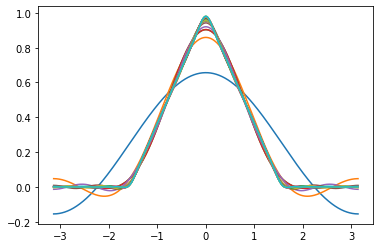

In [3]:
# Define domain

dx = 0.001
L = np.pi
x = L * np.arange(-1+dx, 1+dx, dx)
n = len(x)
nquart = int(np.floor(n/4))

# Define hat function
f = np.zeros_like(x)
f[nquart:2*nquart] = (4/n)*np.arange(1,nquart+1)
f[2*nquart:3*nquart] = np.ones(nquart) - (4/n)*np.arange(0,nquart)

# Compute Fourier series
A0 = np.sum(f * np.ones_like(x)) * dx
fFS = A0/2

A = np.zeros(20)
B = np.zeros(20)
for k in range(20):
    A[k] = np.sum(f * np.cos(np.pi * (k+1) * x/L)) * dx  # Inner Product
    B[k] = np.sum(f * np.sin(np.pi * (k+1) * x/L)) * dx
    fFS = fFS + A[k] * np.cos((k+1)*np.pi*x/L)  +B[k]*np.sin((k+1)*np.pi*x/L)
    plt.plot(x, fFS, '-')

plt.plot()


SyntaxError: invalid syntax (1062418843.py, line 1)